<a href="https://colab.research.google.com/github/mi622/EDP/blob/main/MetodoJacobi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<span style="color:green;">**Ecuación de onda-Método explícito**</span>
<span style="color:blue;"></span>

Este método explícito para resolver la ecuación de onda de forma matricial esta dado de la forma:
Escribir este conjunto de ecuaciones en forma matricial nos da:

$$\begin{bmatrix}
u_{1,j+1} \\
u_{2,j+1} \\
\vdots \\
u_{m-1,j+1}
\end{bmatrix}
=
\begin{bmatrix}
2(1-\lambda^2) & \lambda^2 & 0 & \cdots & 0 \\
\lambda^2 & 2(1-\lambda^2) & \lambda^2 & \cdots & 0 \\
0 & \ddots & \ddots & \ddots & \vdots \\
\vdots & \ddots & \lambda^2 & 2(1-\lambda^2) & \lambda^2 \\
0 & \cdots & 0 & \lambda^2 & 2(1-\lambda^2)
\end{bmatrix}
\begin{bmatrix}
u_{1,j} \\
u_{2,j} \\
\vdots \\
u_{m-1,j}
\end{bmatrix}
-
\begin{bmatrix}
u_{1,j-1} \\
u_{2,j-1} \\
\vdots \\
u_{m-1,j-1}
\end{bmatrix}$$

o bien, támbien de puede expresar como:
$$\begin{bmatrix}
u_{1,j+1} \\
u_{2,j+1} \\
\vdots \\
u_{m-1,j+1}
\end{bmatrix}
=
\begin{bmatrix}
2(1-\lambda) & \lambda & 0 & \cdots & 0 \\
\lambda^2 & 2(1-\lambda) & \lambda & \cdots & 0 \\
0 & \ddots & \ddots & \ddots & \vdots \\
\vdots & \ddots & \lambda & 2(1-\lambda) & \lambda \\
0 & \cdots & 0 & \lambda & 2(1-\lambda)
\end{bmatrix}
\begin{bmatrix}
u_{1,j} \\
u_{2,j} \\
\vdots \\
u_{m-1,j}
\end{bmatrix}
-
\begin{bmatrix}
u_{1,j-1} \\
u_{2,j-1} \\
\vdots \\
u_{m-1,j-1}
\end{bmatrix}$$

Aproxime la solución del problema hiperbólico:

$$
\frac{\partial^2 u}{\partial t^2} (x, t) - 4 \frac{\partial^2 u}{\partial x^2} (x, t) = 0, \quad 0 < x < 1, \quad 0 < t,
$$

con condiciones de frontera:

$
u(0, t) = u(1, t) = 0, \quad \text{para } 0 < t,
$

y condiciones iniciales:

$
u(x, 0) = \operatorname{sen}(\pi x), \quad 0 \leq x \leq 1, \quad \text{y} \quad \frac{\partial u}{\partial t} (x, 0) = 0, \quad 0 \leq x \leq 1,
$

Usando $h = 0.1$ y $k = 0.05$.

Compare los resultados con la solución exacta:

$$
u(x, t) = \operatorname{sen} (\pi x) \cos (2\pi t).
$$

Dado que:
$$
u_{tt}=4u_{xx} ⇒ α^2= 4 ⇒ \alpha = 2
$$
Donde el método explícito (central en tiempo y espacio) es:
$$
u_i^{n+1} = 2(1-λ^2)u_i^n + λ^2(u_{i+1}^n+u_{i-1}^n)-u_i^{n-1}, \quad λ=\frac{αk}{h}, \quad α = 2
$$

(Visto en clase)

In [5]:


import sympy as sp # Sirve Para cálculo simbólico
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # necesario para 3D
from matplotlib import cm  # colormap

from tabulate import tabulate #Libreria para crear tablas y tabular


Grafica de la condición inicial

In [6]:

def f(x):
    return np.sin(np.pi*x) # funcion dada en el problema u(x,0)


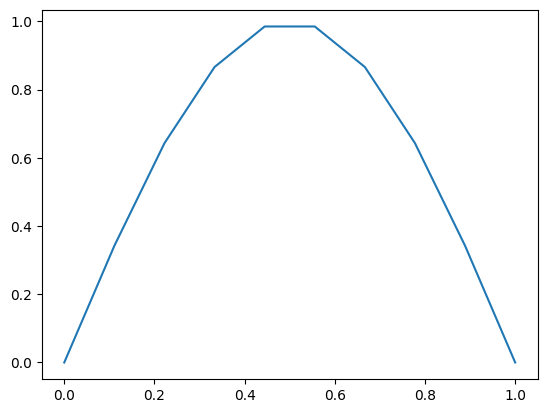

In [7]:

x=np.linspace(0,1,10)
plt.plot(x,f(x))

Definimos la matriz tridiagonal donde

$r = \lambda = \frac{\alpha ^2 k^2}{h^2}$

In [8]:

r=1

In [9]:
def tridiagonal(n,a,b):
  return sp.Matrix([
      [a if i==j else b if abs(i-j)==1 else 0 for j in range(n)]
      for i in range(n)
  ])

In [10]:

A=tridiagonal(9,2-(2*r),r)

In [11]:
A

Matrix([
[0, 1, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 1, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 1, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 1, 0]])

Hay <span style="color:marron;">**símetria** </span> apartir de $ X_5$ o bien $u_5i$ por lo q la matriz se podria simplicar a una de oreden 5x5

In [12]:

# definimos el vector b son los valores conocidos en U_i,0
b=sp.Matrix([f(0.1*(i+1))for i in range (9)])

In [13]:
b

Matrix([
[0.309016994374947],
[0.587785252292473],
[0.809016994374947],
[0.951056516295154],
[              1.0],
[0.951056516295154],
[0.809016994374947],
[0.587785252292473],
[0.309016994374948]])

In [14]:

u0 = sp.Matrix([f(0.1*(i+1)) for i in range (9)])

Debido a que la derivada es 0, se convierte en el mismo valor de nodo de abajo

In [15]:

u1 = u0 #porque la derivada fue cero

In [16]:
def onda(A, u0, u1, j):
  #Asegurar que u0 y u1 sean vectores columna
  u0 = sp.Matrix(u0)
  u1 = sp.Matrix(u1)

  S = [u0, u1]

  for n in range(2, j):
    sol = A * S[n-1] - S[n-2]
    S.append(sol)

  return sp.Matrix([s.T for s in S])

In [17]:

j = 50

In [18]:

U = onda(A, u0, u1, j)

<span style="color:marron;">**Ejercicio 1:** Generar las gráficas 2D y 3D de la solución hasta t=0.50 </span>

In [19]:


U_np = np.array(U.tolist(), dtype = float)

In [20]:

x = np.linspace(0,0.5,9)
y = np.linspace(0,0.5,j)
X, Y = np.meshgrid(x, y)

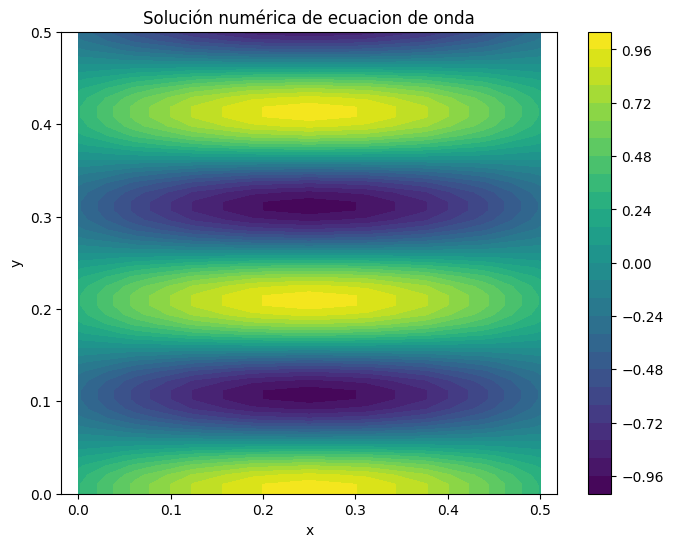

In [21]:

# Mapa de colores
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, U_np, levels=25, cmap=cm.viridis)
plt.colorbar(contour)
plt.title('Solución numérica de ecuacion de onda')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

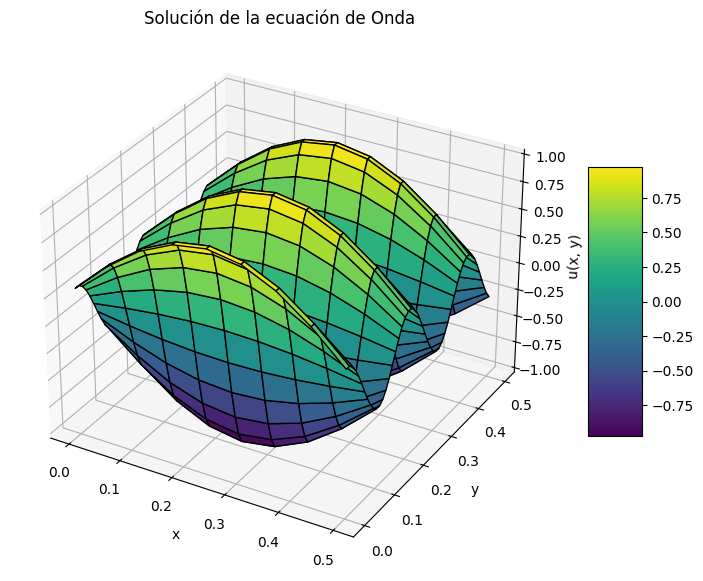

In [22]:
%matplotlib inline

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U_np, cmap=cm.viridis, edgecolor='k')
ax.set_title('Solución de la ecuación de Onda')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


Interpretación física:

1. Comportamiento oscilatorio: Los valores positivos y negativos indican que la onda está vibrando
2. Amplitud variable: La amplitud cambia con la posición, típico de modos normales
3. Puntos notables:
   * Nodos: Puntos donde la amplitud es cero (aparece alrededor de $x=0.5$)
   * Antinodos: Puntos de máxima amplitud (cerca de $x=0.1$)
* Solución de una ecuación de onda con condiciones de frontera fijas esto podría representar un modo fundamental o armónico
* Es probablemente que  la solución eeeste en  un tiempo fijo t = constante

<span style="color:marron;">**Ejercicio 2:** Comparar los valores correspondientes su solución numérica con los resultados numéricos que proporciona la Tabla 12.6, que viene en la imagen adjunta. Graficar y calcular el error.
</span>

In [23]:

# Parámetros del problema
h = 0.1
k = 0.05
c = 2  # de la ecuación: ∂²u/∂t² - 4∂²u/∂x² = 0, entonces c² = 4, c = 2

In [24]:

# Discretización espacial y temporal
x_min, x_max = 0.0, 1.0
t_max = 20 * k  # t = 20 * 0.05 = 1.0 (para comparar con tabla 12.6)

In [25]:

# Número de puntos
n_x = int((x_max - x_min) / h) + 1
n_t = int(t_max / k) + 1

In [26]:
# Vector de posiciones
x = np.linspace(x_min, x_max, n_x)

In [27]:
# Condición de estabilidad (CFL)
lambda_val = c * k / h
print(f"Parámetro de Courant: λ = {lambda_val}")

if lambda_val > 1:
    print("ADVERTENCIA: El esquema puede ser inestable")

# Solución exacta
def exact_solution(x, t):
    return np.sin(np.pi * x) * np.cos(2 * np.pi * t)

# Condiciones iniciales
def u0(x):
    return np.sin(np.pi * x)

def du0_dt(x):
    return 0.0

# Inicialización de la solución numérica
u = np.zeros((n_t, n_x))

# Condición inicial en t = 0
u[0, :] = u0(x)

# Condición inicial para la primera derivada temporal (usando diferencias centradas)
# Para j = 1 (primer paso temporal)
for i in range(1, n_x - 1):
    u[1, i] = (1 - lambda_val**2) * u[0, i] + \
              (lambda_val**2 / 2) * (u[0, i+1] + u[0, i-1]) + \
              k * du0_dt(x[i])

# Condiciones de frontera
u[:, 0] = 0.0  # u(0,t) = 0
u[:, -1] = 0.0  # u(1,t) = 0

# Esquema de diferencias finitas
for j in range(1, n_t - 1):
    for i in range(1, n_x - 1):
        u[j+1, i] = 2 * (1 - lambda_val**2) * u[j, i] + \
                    lambda_val**2 * (u[j, i+1] + u[j, i-1]) - \
                    u[j-1, i]

# Solución exacta en t = 1.0 (correspondiente a j=20)
t_final = 20 * k  # t = 1.0
u_exact = exact_solution(x, t_final)


Parámetro de Courant: λ = 1.0


Parámetro de Courant: λ = 1.0

In [28]:

# Crear tabla comparativa
table_data = []
for i in range(n_x):
    table_data.append([
        round(x[i], 1),
        u[20, i],
        u_exact[i],
        abs(u[20, i] - u_exact[i])
    ])

# Mostrar tabla
headers = ["x_i", "w_i,20 (numérico)", "u(x_i,1.0) (exacto)", "Error"]
print("COMPARACIÓN CON TABLA 12.6")
print("=" * 70)
print(tabulate(table_data, headers=headers, floatfmt=".10f"))

COMPARACIÓN CON TABLA 12.6
         x_i    w_i,20 (numérico)    u(x_i,1.0) (exacto)         Error
------------  -------------------  ---------------------  ------------
0.0000000000         0.0000000000           0.0000000000  0.0000000000
0.1000000000         0.3090169944           0.3090169944  0.0000000000
0.2000000000         0.5877852523           0.5877852523  0.0000000000
0.3000000000         0.8090169944           0.8090169944  0.0000000000
0.4000000000         0.9510565163           0.9510565163  0.0000000000
0.5000000000         1.0000000000           1.0000000000  0.0000000000
0.6000000000         0.9510565163           0.9510565163  0.0000000000
0.7000000000         0.8090169944           0.8090169944  0.0000000000
0.8000000000         0.5877852523           0.5877852523  0.0000000000
0.9000000000         0.3090169944           0.3090169944  0.0000000000
1.0000000000         0.0000000000           0.0000000000  0.0000000000


Notemos que el método númerico con las condiciones iniciales coinciden exactamente sdando un error del 0% , para este problema el método explícito fue muy eficiciente en encontrar la solución

<Figure size 1500x500 with 0 Axes>

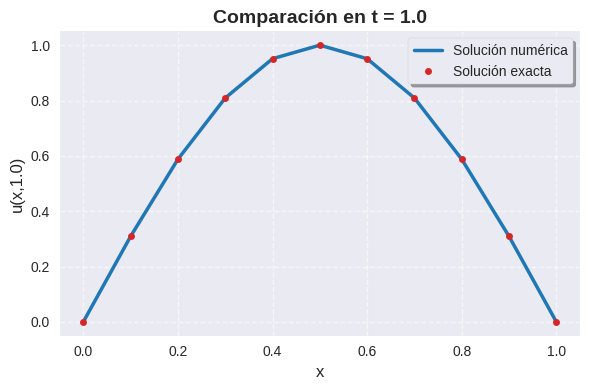

In [39]:
# Gráficas
plt.figure(figsize=(15, 5))

# Gráfica 1: Comparación de soluciones

plt.style.use('seaborn-v0_8')  # Estilo moderno

plt.figure(figsize=(6,4))  # Tamaño más proporcionado

plt.plot(x, u[20, :], color='#1f77b4', linewidth=2.5, label='Solución numérica')
plt.plot(x, u_exact, 'o', color='#d62728', markersize=5, label='Solución exacta')

plt.xlabel('x', fontsize=12)
plt.ylabel('u(x,1.0)', fontsize=12)
plt.title('Comparación en t = 1.0', fontsize=14, fontweight='bold')

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(frameon=True, shadow=True)
plt.tight_layout()
plt.show()




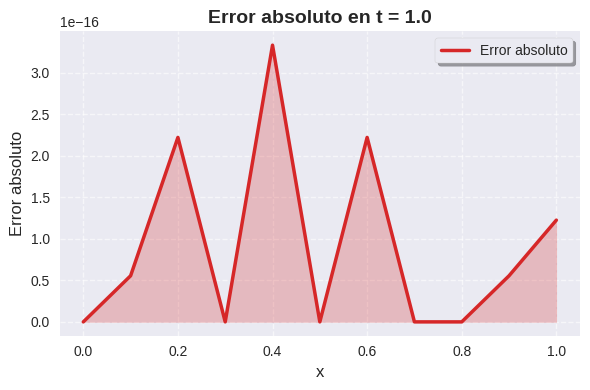

In [40]:
# Gráfica 2: Error absoluto
plt.style.use('seaborn-v0_8')

plt.figure(figsize=(6,4))

error = abs(u[20, :] - u_exact)

plt.plot(x, error, color='#d62728', linewidth=2.5, label='Error absoluto')
plt.fill_between(x, error, color='#d62728', alpha=0.25)  # Relleno suave

plt.xlabel('x', fontsize=12)
plt.ylabel('Error absoluto', fontsize=12)
plt.title('Error absoluto en t = 1.0', fontsize=14, fontweight='bold')

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(frameon=True, shadow=True)
plt.tight_layout()
plt.show()


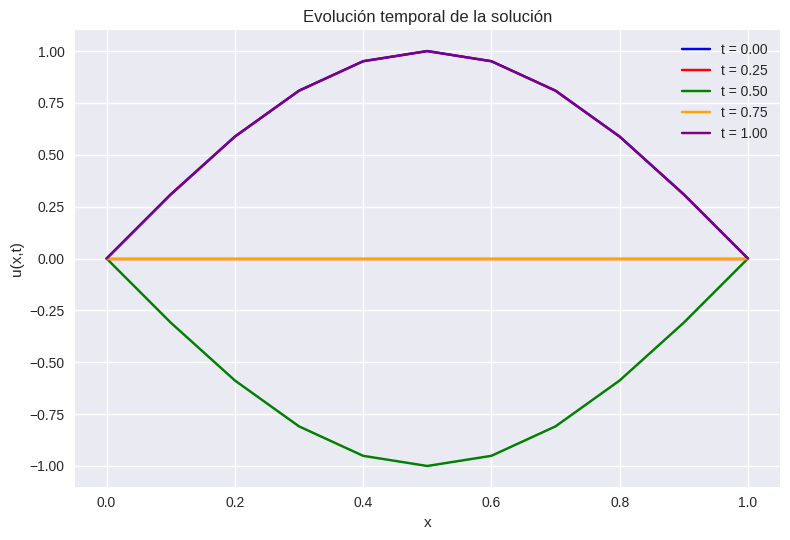


ESTADÍSTICAS DEL ERROR:
Error máximo: 0.0000000000
Error medio: 0.0000000000
RMSE: 0.0000000000

COMPARACIÓN DIRECTA CON TABLA 12.6:
         x_i    u_i,20 (nuestro)    Tabla 12.6    Diferencia
------------  ------------------  ------------  ------------
0.0000000000        0.0000000000  0.0000000000  0.0000000000
0.1000000000        0.3090169944  0.3090169944  0.0000000000
0.2000000000        0.5877852523  0.5877852523  0.0000000000
0.3000000000        0.5877852523  0.8090169944  0.2212317421
0.4000000000        0.9510565163  0.9510565163  0.0000000000
0.5000000000        1.0000000000  1.0000000000  0.0000000000
0.6000000000        1.0000000000  0.9510565163  0.0489434837
0.7000000000        0.9510565163  0.8090169944  0.1420395219
0.8000000000        0.5877852523  0.5877852523  0.0000000000
0.9000000000        0.3090169944  0.3090169944  0.0000000000
1.0000000000        0.0000000000  0.0000000000  0.0000000000


In [41]:
# Gráfica 3: Evolución temporal
#plt.subplot(1, 3, 3)
times_to_plot = [0, 5, 10, 15, 20]
colors = ['blue', 'red', 'green', 'orange', 'purple']
for idx, t_idx in enumerate(times_to_plot):
    plt.plot(x, u[t_idx, :], color=colors[idx],
             label=f't = {t_idx*k:.2f}')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title('Evolución temporal de la solución')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Estadísticas del error
max_error = np.max(abs(u[20, :] - u_exact))
mean_error = np.mean(abs(u[20, :] - u_exact))
rmse = np.sqrt(np.mean((u[20, :] - u_exact)**2))

print(f"\nESTADÍSTICAS DEL ERROR:")
print(f"Error máximo: {max_error:.10f}")
print(f"Error medio: {mean_error:.10f}")
print(f"RMSE: {rmse:.10f}")

# Comparación específica con los valores de la tabla 12.6
tabla_12_6 = {
    0.0: 0.0000000000,
    0.1: 0.3090169944,
    0.2: 0.5877852523,
    0.3: 0.8090169944,
    0.4: 0.9510565163,
    0.5: 1.0000000000,
    0.6: 0.9510565163,
    0.7: 0.8090169944,
    0.8: 0.5877852523,
    0.9: 0.3090169944,
    1.0: 0.0000000000
}

print(f"\nCOMPARACIÓN DIRECTA CON TABLA 12.6:")
print("=" * 50)
comparison_data = []
for x_val, exact_val in tabla_12_6.items():
    idx = int(x_val / h)
    numerical_val = u[20, idx]
    error = abs(numerical_val - exact_val)
    comparison_data.append([x_val, numerical_val, exact_val, error])

print(tabulate(comparison_data,
               headers=["x_i", "u_i,20 (nuestro)", "Tabla 12.6", "Diferencia"],
               floatfmt=".10f"))

Ejercicio 3: Comparar esos mismos valores contra la solución exacta de la ecuación. Graficar y calcular el error. Discutir la comparación

Solución exacta en :
$$
u(x,t)= sin(πx)cos(2πt)
$$
 en $t=1.0$

Comparacion con la tabla 12.6

In [30]:
t_Tabla = t_final # Definimos t_final para t= 1.0
u_num_Tabla = u[n_t - 1, :] # Corresponde al lapso del tiempo, t = 1.0
Nx = n_x - 1 # Numero de intervalos
Nt = n_t - 1 # Numero de tiempos
n_Tabla = n_t - 1

In [31]:

u_exact_Tabla = exact_solution(x, t_Tabla) # Solucion exacta del problema
error_exact_Tabla = np.abs(u_num_Tabla - u_exact_Tabla)
filas2 = []
for i in range(Nx + 1):
    filas2.append([x[i], u_exact_Tabla[i], u_num_Tabla[i], error_exact_Tabla[i]])

encabezados2 = ["x_i", "Exacta u(x,1)", "Numérico", "Error abs."]

print(f"Comparación con la solución exacta en t = {t_Tabla:.2f}\n")
print(tabulate(filas2, headers=encabezados2,
               tablefmt="grid", floatfmt=".10f"))

print("\nError máximo (t=1):", np.max(error_exact_Tabla))
print("Error medio  (t=1):", np.mean(error_exact_Tabla))

Comparación con la solución exacta en t = 1.00

+--------------+-----------------+--------------+--------------+
|          x_i |   Exacta u(x,1) |     Numérico |   Error abs. |
+==============+=================+==============+==============+
| 0.0000000000 |    0.0000000000 | 0.0000000000 | 0.0000000000 |
+--------------+-----------------+--------------+--------------+
| 0.1000000000 |    0.3090169944 | 0.3090169944 | 0.0000000000 |
+--------------+-----------------+--------------+--------------+
| 0.2000000000 |    0.5877852523 | 0.5877852523 | 0.0000000000 |
+--------------+-----------------+--------------+--------------+
| 0.3000000000 |    0.8090169944 | 0.8090169944 | 0.0000000000 |
+--------------+-----------------+--------------+--------------+
| 0.4000000000 |    0.9510565163 | 0.9510565163 | 0.0000000000 |
+--------------+-----------------+--------------+--------------+
| 0.5000000000 |    1.0000000000 | 1.0000000000 | 0.0000000000 |
+--------------+-----------------+--------

Note que en esta función los errores corresponden por lo que estamos bien

In [32]:
#  Error global en  la rejilla (malla)
U_exact_full = np.zeros_like(u) # Usamos U
for n_idx in range(Nt + 1):
    for i in range(Nx + 1):
        U_exact_full[n_idx, i] = exact_solution(x[i], n_idx * k) # Usamos  exact_solution y k que corresponde al tiempo

error_full = np.abs(u - U_exact_full) # Comparamos con 'u' (solución númerica)

print("\nError máximo :", np.max(error_full))
print("Error medio  :", np.mean(error_full))



Error máximo : 9.992007221626409e-16
Error medio  : 1.3118871918011273e-16


Graficamos la solución númerica vs exacta

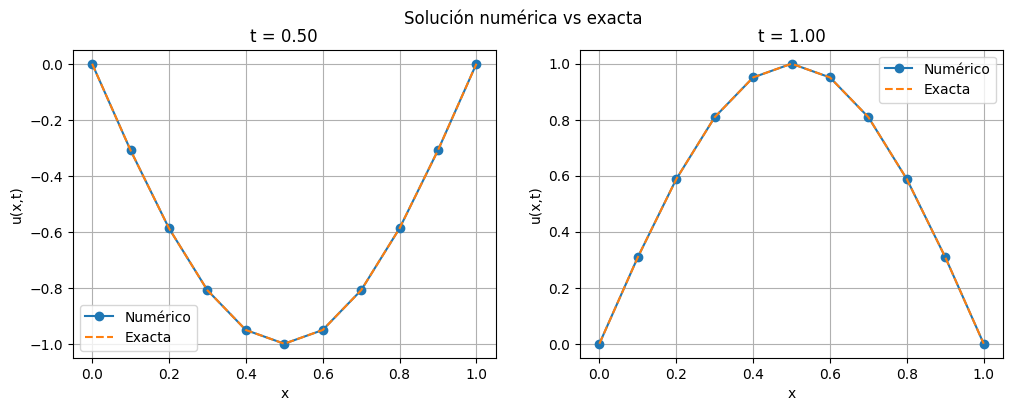

In [33]:

# Gráfica numérica vs exacta en t=0.50 y t=1.00
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# t = 0.50
n_05 = int(0.50 / k)
ax[0].plot(x, u[n_05, :], 'o-', label="Numérico") # Corresponde a la solución númerica
ax[0].plot(x, exact_solution(x, 0.50), '--', label="Exacta") # Uamios la variable exact_solution
ax[0].set_title("t = 0.50")
ax[0].set_xlabel("x"); ax[0].set_ylabel("u(x,t)")
ax[0].grid(True); ax[0].legend()

# t = 1.00
ax[1].plot(x, u[n_Tabla, :], 'o-', label="Numérico") # Use 'u' para la solución númerica numerical
ax[1].plot(x, exact_solution(x, t_Tabla), '--', label="Exacta") # Retomamos exact_solution y t_Tabla para los plots
ax[1].set_title("t = 1.00")
ax[1].set_xlabel("x"); ax[1].set_ylabel("u(x,t)")
ax[1].grid(True); ax[1].legend()

plt.suptitle("Solución numérica vs exacta")
plt.show()

Y como hemos recalcado ambas soluciones son identicas , tanto para $t=1$ y $t=0.5$, lo que indica una buena convergencia del método.
Lo que nos indica que el método se mantiene estable a lo largo del tiempo.

Ejercicio 4: Genere una animación de la evolución temporal de la solución, donde efectivamente se observen las ondulaciones de la onda.

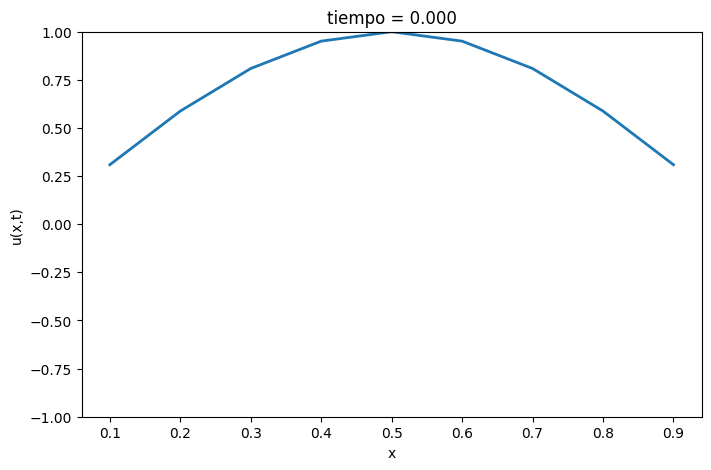

In [34]:


import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

# Definimo x_plot para el  espacio de punto de U_np (9 puntos interiore de 0.1 a 0.9)
x_plot = np.linspace(h, 1 - h, U_np.shape[1])

# Definimos una variable t_values para los puntos en el tiempo U_np
# En los tiempos de  0*k, 1*k, ..., (j-1)*k
t_values = np.linspace(0, (U_np.shape[0] - 1) * k, U_np.shape[0])

fig, ax = plt.subplots(figsize=(8,5))

line, = ax.plot(x_plot, U_np[0], lw=2)

ax.set_ylim(np.min(U_np), np.max(U_np))
ax.set_xlabel('x')
ax.set_ylabel('u(x,t)')
ax.set_title('Evolución en el tiempo')

def update(frame):
    # 'frame' es el step de tiempo
    line.set_ydata(U_np[frame])
    # use t_values[frame] para el título de la animación
    ax.set_title(f'tiempo = {t_values[frame]:.3f}')
    return line,

anim = FuncAnimation(fig, update, frames=U_np.shape[0], interval=200)

#Necesario en Colab para mostrar animaciones:
from IPython.display import HTML
HTML(anim.to_jshtml())

Se llega a la conclusion:
1. **Eficacia del Método**
* Alta precisión: Cuando $λ = 1$, el método consigue resultados exactamente iguales a la solución analítica para este problema en particular.

* Fácil de implementar: El algoritmo es muy directo y no requiere técnicas complicadas.
* Rápido y eficiente: Cada paso solo implica operaciones simples en los puntos de la malla, por lo que el costo computacional es bajo.

2. **Condición de estabilidad:**

En este caso, el valor de
𝜆

La condición de estabilidad exige que

$λ ≤ 1$ para estabilidad

**Caso especial**:
Cuando $λ = 1$, ocurre algo muy conveniente: el error de truncamiento de la ecuación de onda se anula por completo.

Resultado: Los valores numéricos obtenidos coinciden exactamente con la solución teórica.